In [1]:
#import dependencies
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import time
import requests
import io
import os
import matplotlib.pyplot as plt


# Import ESG Data from **Connect_Database.ipynb** 

In [2]:
# # Import the CSV of ESG
# %run Connect_Database.ipynb

Enter database password········


In [3]:
# To find the type of data
Stocks_with_ESG.dtypes

ticker                        object
society_n                     object
society_p                     object
jobs_n                        object
jobs_p                        object
taxes_n                       object
taxes_p                       object
societal_infrastructure_n     object
societal_infrasctucute_p      object
societal_stability_n          object
societal_stability_p          object
equality_human_rights_n       object
eqality_human_rights_p        object
environment_n                 object
environment_p                 object
ghg_emission_n                object
ghg_emission_p                object
non_ghg_emission_n            object
non_ghg_emission_p            object
scarcenatural_resources_n     object
scarce_natural_resources_p    object
bidodiversity_n               object
biodiversity_p                object
waste_n                       object
waste_p                       object
millennials                   object
most_wanted_workforce         object
s

In [4]:
# change the Object to float
cols = Stocks_with_ESG.columns
Stocks_with_ESG[cols[1:]] = Stocks_with_ESG[cols[1:]].astype(float)


In [5]:
# Get total ESG code 
total_ESG=Stocks_with_ESG.sum(axis=1)
total_ESG 

/Users/yicongluo/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


0       8.211
1       9.704
2      11.532
3       6.529
4       3.919
        ...  
107     1.076
108     4.491
109     6.306
110     3.493
111     2.943
Length: 112, dtype: float64

# P/E  and P/S valution 

In [6]:
# Import the CSV
file_to_load = os.path.join("Resources", "latest_stocks_details.csv")
df = pd.read_csv(file_to_load)
df

,TICKER,longName,sector,industry,city,state,country,fullTimeEmployees,revenueGrowth,forwardEps,...,bookValue,returnOnAssets,returnOnEquity,averageVolume,volume,currentPrice,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap
0,INTC,Intel Corporation,Technology,Semiconductors,Santa Clara,CA,United States,121100.0,0.028,3.72,...,23.438,0.08586,0.22522,39084300,36396819,48.27,43.63,68.49,48.27,1.965554e+11
1,MSFT,Microsoft Corporation,Technology,Software—Infrastructure,Redmond,WA,United States,181000.0,0.201,10.75,...,21.335,0.15249,0.49051,37818100,25667615,299.49,231.10,349.67,299.49,2.245237e+12
2,CRM,"salesforce.com, inc.",Technology,Software—Application,San Francisco,CA,United States,73541.0,0.259,5.77,...,58.778,0.00466,0.02899,7395290,8396472,211.11,184.44,311.75,211.11,2.089989e+11
3,BAC,Bank of America Corporation,Financial Services,Banks—Diversified,Charlotte,NC,United States,208000.0,0.125,3.84,...,30.374,0.01068,0.11778,55220451,44508890,43.09,36.51,50.11,43.09,3.475148e+11
4,PYPL,"PayPal Holdings, Inc.",Financial Services,Credit Services,San Jose,CA,United States,30900.0,0.131,5.82,...,18.602,0.03690,0.19952,22186195,14408151,114.65,92.25,310.16,114.65,1.335672e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,COF,Capital One Financial Corporation,Financial Services,Credit Services,McLean,VA,United States,50767.0,0.094,19.00,...,135.757,0.02903,0.20447,3011793,1952746,133.99,121.44,177.95,133.99,5.435573e+10
85,BBY,"Best Buy Co., Inc.",Consumer Cyclical,Specialty Retail,Richfield,MN,United States,57750.0,-0.034,10.58,...,13.281,0.10288,0.64519,3257321,1712013,96.59,85.58,141.97,96.59,2.175477e+10
86,KMB,Kimberly-Clark Corporation,Consumer Defensive,Household & Personal Products,Dallas,TX,United States,45000.0,0.027,7.05,...,1.526,0.10050,2.29639,1994015,1877043,120.61,117.32,145.79,120.61,4.063689e+10
87,EMN,Eastman Chemical Company,Basic Materials,Chemicals,Kingsport,TN,United States,14000.0,0.232,10.57,...,44.245,0.07385,0.14576,1281210,1284352,109.36,98.24,130.47,109.36,1.410394e+10


In [7]:
# Get average P/S dataframe
average_df=df.groupby('industry').mean()
ps_average_df=average_df.filter(['priceToSalesTrailing12Months','industry'], axis=1)
ps_average_df

,priceToSalesTrailing12Months
industry,
Aerospace & Defense,1.901520
Airlines,0.949976
Asset Management,5.779542
Auto Manufacturers,0.494689
Banks—Diversified,2.760013
Banks—Regional,3.056496
Beverages—Non-Alcoholic,2.947739
Building Products & Equipment,1.134175
Capital Markets,1.898072


In [8]:
# Get average P/E dataframe
average_df=df.groupby('industry').mean()
pe_average_df=average_df.filter(['trailingPE','industry'], axis=1)
pe_average_df

,trailingPE
industry,
Aerospace & Defense,18.137151
Airlines,0.000000
Asset Management,19.268969
Auto Manufacturers,14.626659
Banks—Diversified,9.610917
Banks—Regional,9.116466
Beverages—Non-Alcoholic,27.850084
Building Products & Equipment,9.919448
Capital Markets,5.535378


In [9]:
#Merge the industried average to CSV
stock_df = pd.merge(df, ps_average_df,on='industry',suffixes=['','_In_Average'])
stock_df = pd.merge(stock_df, pe_average_df,on='industry',suffixes=['','_In_Average'])
stock_df

,TICKER,longName,sector,industry,city,state,country,fullTimeEmployees,revenueGrowth,forwardEps,...,returnOnEquity,averageVolume,volume,currentPrice,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap,priceToSalesTrailing12Months_In_Average,trailingPE_In_Average
0,INTC,Intel Corporation,Technology,Semiconductors,Santa Clara,CA,United States,121100.0,0.028,3.72,...,0.22522,39084300,36396819,48.27,43.63,68.49,48.27,1.965554e+11,10.324441,31.979438
1,NVDA,NVIDIA Corporation,Technology,Semiconductors,Santa Clara,CA,United States,18975.0,0.503,5.21,...,0.41940,51417521,48902507,256.34,122.72,346.47,256.34,6.387992e+11,10.324441,31.979438
2,QCOM,QUALCOMM Incorporated,Technology,Semiconductors,San Diego,CA,United States,45000.0,0.300,11.64,...,1.06739,10768363,7237353,152.87,122.17,193.58,152.87,1.712144e+11,10.324441,31.979438
3,MSFT,Microsoft Corporation,Technology,Software—Infrastructure,Redmond,WA,United States,181000.0,0.201,10.75,...,0.49051,37818100,25667615,299.49,231.10,349.67,299.49,2.245237e+12,9.313245,26.081035
4,ADBE,Adobe Inc.,Technology,Software—Infrastructure,San Jose,CA,United States,0.0,0.200,16.25,...,0.34368,3719011,13829725,422.90,407.94,699.54,422.90,2.012158e+11,9.313245,26.081035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,ECL,Ecolab Inc.,Basic Materials,Specialty Chemicals,Saint Paul,MN,United States,47000.0,0.098,6.14,...,0.17005,1588386,1900582,173.74,154.85,238.93,173.74,4.974107e+10,3.906438,44.434784
85,DLR,"Digital Realty Trust, Inc.",Real Estate,REIT—Office,Austin,TX,United States,3030.0,0.009,1.57,...,0.09442,1660520,909264,136.65,130.10,178.22,136.65,3.968329e+10,8.965615,23.005049
86,TT,Trane Technologies plc,Industrials,Specialty Industrial Machinery,Swords,0,Ireland,37000.0,0.123,7.87,...,0.22948,1637581,1180438,152.89,142.53,207.06,152.89,3.570563e+10,2.525794,26.023830
87,BBY,"Best Buy Co., Inc.",Consumer Cyclical,Specialty Retail,Richfield,MN,United States,57750.0,-0.034,10.58,...,0.64519,3257321,1712013,96.59,85.58,141.97,96.59,2.175477e+10,0.420293,9.816056


In [10]:
# rename columns of the P/E and P/S name 
stock_df = stock_df.rename(columns={'priceToSalesTrailing12Months_In_Average': 'P/S_in_Average', 'trailingPE_In_Average': 'P/E_in_Average','currentPrice':'Mv Price',
                                   'priceToSalesTrailing12Months': 'P/S', 'trailingPE': 'P/E'})



stock_df

,TICKER,longName,sector,industry,city,state,country,fullTimeEmployees,revenueGrowth,forwardEps,...,returnOnEquity,averageVolume,volume,Mv Price,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap,P/S_in_Average,P/E_in_Average
0,INTC,Intel Corporation,Technology,Semiconductors,Santa Clara,CA,United States,121100.0,0.028,3.72,...,0.22522,39084300,36396819,48.27,43.63,68.49,48.27,1.965554e+11,10.324441,31.979438
1,NVDA,NVIDIA Corporation,Technology,Semiconductors,Santa Clara,CA,United States,18975.0,0.503,5.21,...,0.41940,51417521,48902507,256.34,122.72,346.47,256.34,6.387992e+11,10.324441,31.979438
2,QCOM,QUALCOMM Incorporated,Technology,Semiconductors,San Diego,CA,United States,45000.0,0.300,11.64,...,1.06739,10768363,7237353,152.87,122.17,193.58,152.87,1.712144e+11,10.324441,31.979438
3,MSFT,Microsoft Corporation,Technology,Software—Infrastructure,Redmond,WA,United States,181000.0,0.201,10.75,...,0.49051,37818100,25667615,299.49,231.10,349.67,299.49,2.245237e+12,9.313245,26.081035
4,ADBE,Adobe Inc.,Technology,Software—Infrastructure,San Jose,CA,United States,0.0,0.200,16.25,...,0.34368,3719011,13829725,422.90,407.94,699.54,422.90,2.012158e+11,9.313245,26.081035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,ECL,Ecolab Inc.,Basic Materials,Specialty Chemicals,Saint Paul,MN,United States,47000.0,0.098,6.14,...,0.17005,1588386,1900582,173.74,154.85,238.93,173.74,4.974107e+10,3.906438,44.434784
85,DLR,"Digital Realty Trust, Inc.",Real Estate,REIT—Office,Austin,TX,United States,3030.0,0.009,1.57,...,0.09442,1660520,909264,136.65,130.10,178.22,136.65,3.968329e+10,8.965615,23.005049
86,TT,Trane Technologies plc,Industrials,Specialty Industrial Machinery,Swords,0,Ireland,37000.0,0.123,7.87,...,0.22948,1637581,1180438,152.89,142.53,207.06,152.89,3.570563e+10,2.525794,26.023830
87,BBY,"Best Buy Co., Inc.",Consumer Cyclical,Specialty Retail,Richfield,MN,United States,57750.0,-0.034,10.58,...,0.64519,3257321,1712013,96.59,85.58,141.97,96.59,2.175477e+10,0.420293,9.816056


In [11]:
# filter the columns that we need 
No1_stock_df=stock_df.filter(['TICKER','longName','P/E_in_Average','P/S_in_Average','industry','P/E','P/S', 'Mv Price'], axis=1)
No1_stock_df

,TICKER,longName,P/E_in_Average,P/S_in_Average,industry,P/E,P/S,Mv Price
0,INTC,Intel Corporation,31.979438,10.324441,Semiconductors,9.932098,2.487288,48.27
1,NVDA,NVIDIA Corporation,31.979438,10.324441,Semiconductors,66.581820,23.734830,256.34
2,QCOM,QUALCOMM Incorporated,31.979438,10.324441,Semiconductors,19.424397,4.751204,152.87
3,MSFT,Microsoft Corporation,26.081035,9.313245,Software—Infrastructure,31.897964,12.142786,299.49
4,ADBE,Adobe Inc.,26.081035,9.313245,Software—Infrastructure,42.205585,12.747280,422.90
...,...,...,...,...,...,...,...,...
84,ECL,Ecolab Inc.,44.434784,3.906438,Specialty Chemicals,44.434784,3.906438,173.74
85,DLR,"Digital Realty Trust, Inc.",23.005049,8.965615,REIT—Office,23.005049,8.965615,136.65
86,TT,Trane Technologies plc,26.023830,2.525794,Specialty Industrial Machinery,26.023830,2.525794,152.89
87,BBY,"Best Buy Co., Inc.",9.816056,0.420293,Specialty Retail,9.816056,0.420293,96.59


## P/E Branch Analysis

In [12]:
# Use P/E to compare the average

# Get % rate difference between P/E of stock and P/E of industry
PE_rate=(No1_stock_df['P/E_in_Average']-No1_stock_df['P/E'])/No1_stock_df['P/E']


In [13]:

# Use the P/E valuation to get the stock price
PE_valuation_Stock_Price=(1+PE_rate)*No1_stock_df['P/E_in_Average']
PE_valuation_Stock_Price

0     102.967618
1      15.359816
2      52.649484
3      21.324884
4      16.116833
         ...    
84     44.434784
85     23.005049
86     26.023830
87      9.816056
88     17.497600
Length: 89, dtype: float64

In [14]:
# Get Difference bewteen MV Price
Diff_PE=stock_df['Mv Price']-PE_valuation_Stock_Price
Diff_PE

0     -54.697618
1     240.980184
2     100.220516
3     278.165116
4     406.783167
         ...    
84    129.305216
85    113.644951
86    126.866170
87     86.773944
88     91.862400
Length: 89, dtype: float64

In [15]:
# Create Dataframe for P/E valuation, Market value price and difference
pd.DataFrame({"Predicted Price": PE_valuation_Stock_Price, "Mv Price": stock_df['Mv Price'], "Difference": Diff_PE})[["Predicted Price", "Mv Price", "Difference"]]

,Predicted Price,Mv Price,Difference
0,102.967618,48.27,-54.697618
1,15.359816,256.34,240.980184
2,52.649484,152.87,100.220516
3,21.324884,299.49,278.165116
4,16.116833,422.90,406.783167
...,...,...,...
84,44.434784,173.74,129.305216
85,23.005049,136.65,113.644951
86,26.023830,152.89,126.866170
87,9.816056,96.59,86.773944


In [16]:
# Set X,y for Linear Regression
from sklearn.linear_model import LinearRegression
X =total_ESG.values.reshape(-1, 1)
y = Diff_PE.values.reshape(-1, 1)


In [17]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()


ValueError: x and y must have same first dimension, but have shapes (112, 1) and (89, 1)

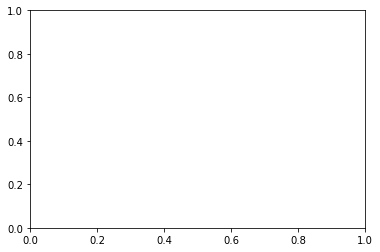

In [18]:
plt.plot(X, y, color='red')

In [ ]:
# fit the model
model.fit(X,y)
print(model)

In [30]:

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
y_pred = model.predict(X)
print(y_pred.shape)

In [ ]:
# Plot the Graph of Liner Regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

## P/S Branch Analysis

In [ ]:
# Use P/S to compare the average

# Get % rate difference between P/S of stock and P/S of industry
PE_rate=(No1_stock_df['P/S_in_Average']-No1_stock_df['P/S'])/No1_stock_df['P/S']

In [ ]:

# Use the P/E valuation to get the stock price
PS_valuation_Stock_Price=(1+PE_rate)*No1_stock_df['P/S_in_Average']
PS_valuation_Stock_Price

In [ ]:
# Get Difference bewteen MV Price
Diff_PS=stock_df['Mv Price']-PE_valuation_Stock_Price
Diff_PS

In [ ]:
# Create Dataframe for P/E valuation, Market value price and difference
pd.DataFrame({"Predicted Price": PS_valuation_Stock_Price, "Mv Price": stock_df['Mv Price'], "Difference": Diff_PS})[["Predicted Price", "Mv Price", "Difference"]]

# Dividend Discount Model

In [19]:
# create the datafram for dividend discount model
div_stock_df=stock_df.filter(['TICKER','longName','beta','industry','dividendRate','revenueGrowth', 'Mv Price'], axis=1)
div_stock_df

,TICKER,longName,beta,P/S_in_Average,industry,dividendRate,revenueGrowth,Mv Price
0,INTC,Intel Corporation,0.545767,10.324441,Semiconductors,1.46,0.028,48.27
1,NVDA,NVIDIA Corporation,1.411417,10.324441,Semiconductors,0.16,0.503,256.34
2,QCOM,QUALCOMM Incorporated,1.258366,10.324441,Semiconductors,2.72,0.300,152.87
3,MSFT,Microsoft Corporation,0.910925,9.313245,Software—Infrastructure,2.48,0.201,299.49
4,ADBE,Adobe Inc.,1.003041,9.313245,Software—Infrastructure,0.00,0.200,422.90
...,...,...,...,...,...,...,...,...
84,ECL,Ecolab Inc.,1.097933,3.906438,Specialty Chemicals,2.04,0.098,173.74
85,DLR,"Digital Realty Trust, Inc.",0.336122,8.965615,REIT—Office,4.88,0.009,136.65
86,TT,Trane Technologies plc,1.308070,2.525794,Specialty Industrial Machinery,2.68,0.123,152.89
87,BBY,"Best Buy Co., Inc.",1.533956,0.420293,Specialty Retail,3.52,-0.034,96.59


In [21]:
# calculate the cost of equity by GPD growth rate 5.7% and Treasury Rate 1.52%

cost_of_equity= div_stock_df['beta']*(0.057-0.0213)+0.0152
cost_of_equity

0     0.034684
1     0.065588
2     0.060124
3     0.047720
4     0.051009
        ...   
84    0.054396
85    0.027200
86    0.061898
87    0.069962
88    0.068873
Name: beta, Length: 89, dtype: float64

# Above must add average price

In [29]:
div_valuation_Stock_Price=(div_stock_df['Mv Price']*div_stock_df['dividendRate']/100)/(cost_of_equity)
div_valuation_Stock_Price

0      20.319006
1       6.253378
2      69.158524
3     155.644352
4       0.000000
         ...    
84     65.157042
85    245.170184
86     66.196734
87     48.597194
88     48.270678
Length: 89, dtype: float64